# Проведение расчётов и исследований

In [60]:
import pandas as pd
from dython.nominal import associations
import matplotlib.pyplot as plt
import seaborn as sns

### Базовая подготовка датасета к проведению рассчетов

In [61]:
column_names = [
    'year',  # Год
    'season',  # Время года
    'climate',  # Климат
    'city',  # Город
    'country',  # Страна
    'cooling_method',  # Способ охлаждения
    'mixed_cooling_mode',  # Режим при смешанном типе охлаждения
    'heating_method',  # Способ обогрева
    'age',  # Возраст
    'gender',  # Пол
    'temperature_feeling',  # Ощущение температуры
    'temperature_feeling_bool',  # Ощущение температуры (bool)
    'preferred_temperature_change',  # Предпочтительное изменение температуры
    'air_movement_feeling_bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change',  # Предпочтительное изменение движения воздуха
    'comfort_rating',  # Оценка комфорта
    'clothing_insulation',  # Утепление
    'indoor_air_temperature',  # Температура воздуха в помещении
    'outdoor_air_temperature',  # Температура воздуха на улице
    'relative_humidity',  # Относительная влажность (RH)
    'air_speed',  # Скорость воздуха
    'height',  # Рост
    'weight',  # Вес
    'curtains',  # Занавески
    'fan_mode',  # Вентилятор
    'window_status',  # Окно
    'door_status',  # Двери
    'heating_mode',  # Отопление
    'average_monthly_outdoor_temperature',  # Среднемесячная температура на улице
    'number_of_complaints'  # Количество рекламаций
]

column_types = {
    'year': 'int',  # Год (целое число)
    'season': 'category',  # Время года (категориальная переменная: весна, лето и т.д.)
    'climate': 'category',  # Климат (категориальная переменная: названия типов климата)
    'city': 'category',  # Город (категориальная переменная)
    'country': 'category',  # Страна (категориальная переменная)
    'cooling_method': 'category',  # Способ охлаждения (категориальная переменная)
    'mixed_cooling_mode': 'category',  # Режим при смешанном типе охлаждения (категориальная переменная)
    'heating_method': 'category',  # Способ обогрева (категориальная переменная)
    'age': 'int',  # Возраст (целое число)
    'gender': 'category',  # Пол (категориальная переменная: мужской/женский)
    'temperature_feeling': 'float',  # Ощущение температуры (целое число от -3 до +3)
    'temperature_feeling_bool': 'bool',  # Ощущение температуры (bool)
    'preferred_temperature_change': 'category',  # Предпочтительное изменение температуры (категориальная переменная)
    'air_movement_feeling_bool': 'bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change': 'category',  # Предпочтительное изменение движения воздуха (категориальная переменная)
    'comfort_rating': 'int',  # Оценка комфорта (целое число от 1 до 6)
    'clothing_insulation': 'float',  # Утепление (вещественное число, связанный с одеждой фактор)
    'indoor_air_temperature': 'float',  # Температура воздуха в помещении (вещественное число)
    'outdoor_air_temperature': 'float',  # Температура воздуха на улице (вещественное число)
    'relative_humidity': 'float',  # Относительная влажность (вещественное число)
    'air_speed': 'float',  # Скорость воздуха (вещественное число)
    'height': 'float',  # Рост (вещественное число)
    'weight': 'float',  # Вес (вещественное число)
    'curtains': 'bool',  # Занавески (категориальная переменная: 0 или 1)
    'fan_mode': 'bool',  # Вентилятор (категориальная переменная: 0 или 1)
    'window_status': 'bool',  # Окно (категориальная переменная: 0 или 1)
    'door_status': 'bool',  # Двери (категориальная переменная: 0 или 1)
    'heating_mode': 'bool',  # Отопление (категориальная переменная: 0 или 1)
    'average_monthly_outdoor_temperature': 'float',  # Среднемесячная температура на улице (вещественное число)
    'number_of_complaints': 'int'  # Количество рекламаций (целое число)
}

In [62]:
df = pd.read_csv(
    'data/cleared_data.csv',
    # sep=';',
    # decimal='.',
    # header=0,
    # names=column_names
)

df.head()


,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,...,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,42,Unknown,...,0.08,NaN,NaN,False,False,True,True,True,32.8,0
1,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,27,Unknown,...,0.21,NaN,NaN,True,True,True,True,True,28.9,0
2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,32,Unknown,...,0.10,NaN,NaN,True,True,True,True,True,32.8,0
3,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,43,Unknown,...,0.15,NaN,NaN,True,True,True,True,True,32.8,0
4,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,32,Unknown,...,0.14,NaN,NaN,False,False,True,True,True,32.8,0


In [63]:
df.shape

(372, 30)

In [64]:
df.isna().sum()

year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                       0
heating_method                           0
age                                      0
gender                                   0
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool                0
preferred_air_movement_change            0
comfort_rating                         243
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                335
relative_humidity                        0
air_speed                                0
height                                 280
weight                                 231
curtains   

In [65]:
df.dtypes

year                                     int64
season                                  object
climate                                 object
city                                    object
country                                 object
cooling_method                          object
mixed_cooling_mode                      object
heating_method                          object
age                                      int64
gender                                  object
temperature_feeling                    float64
temperature_feeling_bool                  bool
preferred_temperature_change            object
air_movement_feeling_bool                 bool
preferred_air_movement_change           object
comfort_rating                         float64
clothing_insulation                      int64
indoor_air_temperature                 float64
outdoor_air_temperature                float64
relative_humidity                      float64
air_speed                              float64
height       

In [66]:
# df = pd.read_csv(
#     'data/data.csv',
#     sep=';',
#     decimal='.',
#     header=0,
#     names=column_names
# )

# df.to_csv('data/norm_data.csv', index=False)

# df = df.drop(['height', 'weight'], axis=1)

# df['cooling_method'].fillna("NA")
# df['mixed_cooling_mode'].fillna("NA")
# df['heating_method'].fillna("NA")

# df['comfort_rating'].fillna(3)

# for column in df.columns:
#     mode_value = df[column].mode()[0] if not df[column].mode().empty else None
#     df[column] = df[column].fillna(mode_value)

df = df.astype(column_types, errors='ignore')

# df = df.drop_duplicates(keep='first')

# df.head()

In [67]:
df.dtypes

year                                      int64
season                                 category
climate                                category
city                                   category
country                                category
cooling_method                         category
mixed_cooling_mode                     category
heating_method                         category
age                                       int64
gender                                 category
temperature_feeling                     float64
temperature_feeling_bool                   bool
preferred_temperature_change           category
air_movement_feeling_bool                  bool
preferred_air_movement_change          category
comfort_rating                          float64
clothing_insulation                     float64
indoor_air_temperature                  float64
outdoor_air_temperature                 float64
relative_humidity                       float64
air_speed                               

### Рассчеты

In [68]:
df.head()

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,...,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,42,Unknown,...,0.08,NaN,NaN,False,False,True,True,True,32.8,0
1,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,27,Unknown,...,0.21,NaN,NaN,True,True,True,True,True,28.9,0
2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,32,Unknown,...,0.10,NaN,NaN,True,True,True,True,True,32.8,0
3,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,43,Unknown,...,0.15,NaN,NaN,True,True,True,True,True,32.8,0
4,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,32,Unknown,...,0.14,NaN,NaN,False,False,True,True,True,32.8,0


Создать дополнительный категориальный столбец, который покажет количество рекламаций по каждому клиенту отдельно: мало (≤1), средне (=2), много (>2).

In [69]:
df['complaints_cat'] = ['few' if x <= 1 else 'medium' if x == 2 else "many" for x in df['number_of_complaints']]
df['complaints_cat'] = df['complaints_cat'].astype('category')

df[['number_of_complaints', 'complaints_cat']].sample(5)

,number_of_complaints,complaints_cat
148,0,few
80,0,few
121,0,few
198,0,few
45,0,few


Рассчитать средний возраст респондентов по полу и стране

In [70]:
tmp = df[['gender', 'age', 'country']].copy()
mean_age_df = tmp.groupby(['gender', 'country'], observed=False).mean().copy()

mean_age_df.rename(columns={
    'age': 'age_mean',
}, inplace=True)

mean_age_df.to_csv('data/mean_age.csv')

mean_age_df

age_mean
gender  country             
Unknown Австралия        NaN
        Индия            NaN
        США        36.054054
Женский Австралия  46.176471
        Индия      38.023256
        США              NaN
Мужской Австралия  42.614679
        Индия      38.081633
        США              NaN

In [71]:
df.query('gender == "Женский" and country == "США"') # WTF

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,...,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints,complaints_cat


Добавить категориальный столбец, разделив респондентов на три категории по возрасту: до 44 лет - молодой возраст, 45 - 59 лет - средний возраст, 60 лет и больше - пожилой возраст.

In [72]:
df['age_cat'] = ['young_age' if x <= 44 else 'mean_age' if 45 <= x <= 59 else "old_age" for x in df['age']]
df['age_cat'] = df['age_cat'].astype('category')

df[['age', 'age_cat']].sample(5)

,age,age_cat
365,43,young_age
269,45,mean_age
105,35,young_age
249,45,mean_age
316,43,young_age


Рассчитать среднюю комфортную температуру в зависимости от возрастной категории

In [73]:
tmp = df[['temperature_feeling_bool', 'age_cat', 'indoor_air_temperature', 'outdoor_air_temperature']].copy()
avarage_comf_temp_df = tmp.groupby(['temperature_feeling_bool', 'age_cat'], observed=False).mean()

avarage_comf_temp_df.rename(columns={
    'indoor_air_temperature': 'indoor_air_temperature_mean',
    'outdoor_air_temperature': 'outdoor_air_temperature_mean',
}, inplace=True)

avarage_comf_temp_df.to_csv('data/avarage_comf_temp.csv')

avarage_comf_temp_df

indoor_air_temperature_mean  \
temperature_feeling_bool age_cat                                  
False                    mean_age                     24.351724   
                         old_age                      24.700000   
                         young_age                    25.732432   
True                     mean_age                     24.117647   
                         old_age                      24.912500   
                         young_age                    24.831250   

                                    outdoor_air_temperature_mean  
temperature_feeling_bool age_cat                                  
False                    mean_age                      23.400000  
                         old_age                             NaN  
                         young_age                     24.516667  
True                     mean_age                      23.950000  
                         old_age                             NaN  
                         young_age                     24.061538

Рассчитать медианное значение температуры и влажности для каждого типа охлаждения

In [74]:
tmp = df[['cooling_method', 'indoor_air_temperature', 'outdoor_air_temperature', 'relative_humidity']].copy()
median_temp_df = tmp.groupby(['cooling_method'], observed=False).median()

median_temp_df.rename(columns={
    'indoor_air_temperature': 'indoor_air_temperature_median',
    'outdoor_air_temperature': 'outdoor_air_temperature_median',
    'relative_humidity': 'relative_humidity_median'
}, inplace=True)

median_temp_df.to_csv("data/median_temp.csv")

median_temp_df

,indoor_air_temperature_median,outdoor_air_temperature_median,relative_humidity_median
cooling_method,,,
Вентиляция,25.25,NaN,47.65
Кондиционирование,24.40,24.0,43.35
Смешанный,24.50,NaN,58.05


Добавить столбец с процентом удовлетворенных респондентов температурой воздуха в помещении относительно всех респондентов одной страны и одного пола

In [75]:
df['satisfaction_percentage'] = (
    df.groupby(['country', 'gender'], observed=False)['temperature_feeling_bool']
      .transform(lambda x: (x.mean() * 100).round(2))
)

df[['country', 'gender', 'temperature_feeling_bool', 'satisfaction_percentage']].sample(5)

,country,gender,temperature_feeling_bool,satisfaction_percentage
112,Австралия,Мужской,True,88.07
222,Австралия,Мужской,False,88.07
132,Австралия,Женский,False,70.59
194,Австралия,Женский,True,70.59
278,Индия,Женский,True,81.40


Составить сводную таблицу, в которой данные будут сгруппированы по стране, полу, возрастной группе и подсчитаны средняя температура воздуха в помещении, на улице и средняя относительная влажность для каждой из этих групп.

In [76]:
tmp = df[['country', 'gender', 'age_cat', 'indoor_air_temperature', 'outdoor_air_temperature', 'relative_humidity']].copy()

summary_df = tmp.groupby(['country', 'gender', 'age_cat'], observed=False).mean()

summary_df.rename(columns={
    'indoor_air_temperature': 'avg_indoor_temp',
    'outdoor_air_temperature': 'avg_outdoor_temp',
    'relative_humidity': 'avg_relative_humidity'
}, inplace=True)

summary_df.to_csv("data/summary.csv")

summary_df

avg_indoor_temp  avg_outdoor_temp  \
country   gender  age_cat                                        
Австралия Unknown mean_age               NaN               NaN   
                  old_age                NaN               NaN   
                  young_age              NaN               NaN   
          Женский mean_age         24.061538               NaN   
                  old_age          24.900000               NaN   
                  young_age        23.840000               NaN   
          Мужской mean_age         24.044262               NaN   
                  old_age          24.733333               NaN   
                  young_age        24.146667               NaN   
Индия     Unknown mean_age               NaN               NaN   
                  old_age                NaN               NaN   
                  young_age              NaN               NaN   
          Женский mean_age         25.200000               NaN   
                  old_age                NaN               NaN   
                  young_age        25.654286               NaN   
          Мужской mean_age         24.377273               NaN   
                  old_age                NaN               NaN   
                  young_age        25.790789               NaN   
США       Unknown mean_age         24.080000         23.840000   
                  old_age                NaN               NaN   
                  young_age        24.431250         24.146875   
          Женский mean_age               NaN               NaN   
                  old_age                NaN               NaN   
                  young_age              NaN               NaN   
          Мужской mean_age               NaN               NaN   
                  old_age                NaN               NaN   
                  young_age              NaN               NaN   

                             avg_relative_humidity  
country   gender  age_cat                           
Австралия Unknown mean_age                     NaN  
                  old_age                      NaN  
                  young_age                    NaN  
          Женский mean_age               61.078846  
                  old_age                44.550000  
                  young_age              61.368000  
          Мужской mean_age               61.680328  
                  old_age                64.366667  
                  young_age              61.668889  
Индия     Unknown mean_age                     NaN  
                  old_age                      NaN  
                  young_age                    NaN  
          Женский mean_age               56.637500  
                  old_age                      NaN  
                  young_age              50.711429  
          Мужской mean_age               53.868182  
                  old_age                      NaN  
                  young_age              49.710526  
США       Unknown mean_age               38.600000  
                  old_age                      NaN  
                  young_age              37.790625  
          Женский mean_age                     NaN  
                  old_age                      NaN  
                  young_age                    NaN  
          Мужской mean_age                     NaN  
                  old_age                      NaN  
                  young_age                    NaN

Самостоятельно найти информацию по стандартной комфортной относительной влажности в помещениях (в нашем случае - офисы). Создать новый категориальный столбец, в котором будет показано, удовлетворяет ли зафиксированная относительная влажность стандарту или нет. Категории назначить самостоятельно.

https://airwet.ru/tpost/xogv3ijut1-norma-vlazhnosti-vozduha-v-ofise-dlya-ko

На основе этих данных можно определить следующие категории:

"Комфортная" : влажность в пределах 40–60% .
"Низкая" : влажность ниже 40% .
"Высокая" : влажность выше 60% .

In [77]:
def categorize_humidity(humidity):
    if 40 <= humidity <= 60:
        return 'Комфортная'
    elif humidity < 40:
        return 'Низкая'
    else:
        return 'Высокая'
    
df['humidity_category'] = df['relative_humidity'].apply(categorize_humidity).astype("category")

df[['relative_humidity', 'humidity_category']].sample(5)

,relative_humidity,humidity_category
100,62.3,Высокая
6,35.3,Низкая
61,58.5,Комфортная
244,46.2,Комфортная
108,69.7,Высокая


In [78]:
df.to_csv("data/researched_data.csv")

Исследовать корреляцию между параметрами. Объяснить наиболее коррелирующие параметры, имеет ли это реальный смысл или просто особенность данных?

In [79]:
df.head()

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,...,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints,complaints_cat,age_cat,satisfaction_percentage,humidity_category
0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,42,Unknown,...,False,True,True,True,32.8,0,few,young_age,81.08,Низкая
1,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,27,Unknown,...,True,True,True,True,28.9,0,few,young_age,81.08,Низкая
2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,32,Unknown,...,True,True,True,True,32.8,0,few,young_age,81.08,Комфортная
3,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,43,Unknown,...,True,True,True,True,32.8,0,few,young_age,81.08,Низкая
4,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,32,Unknown,...,False,True,True,True,32.8,0,few,young_age,81.08,Низкая


In [80]:
df.dtypes

year                                      int64
season                                 category
climate                                category
city                                   category
country                                category
cooling_method                         category
mixed_cooling_mode                     category
heating_method                         category
age                                       int64
gender                                 category
temperature_feeling                     float64
temperature_feeling_bool                   bool
preferred_temperature_change           category
air_movement_feeling_bool                  bool
preferred_air_movement_change          category
comfort_rating                          float64
clothing_insulation                     float64
indoor_air_temperature                  float64
outdoor_air_temperature                 float64
relative_humidity                       float64
air_speed                               

In [81]:
cat_cols = df.columns[(df.dtypes == "category") | (df.dtypes == "bool")].to_list()
cat_cols

['season',
 'climate',
 'city',
 'country',
 'cooling_method',
 'mixed_cooling_mode',
 'heating_method',
 'gender',
 'temperature_feeling_bool',
 'preferred_temperature_change',
 'air_movement_feeling_bool',
 'preferred_air_movement_change',
 'curtains',
 'fan_mode',
 'window_status',
 'door_status',
 'heating_mode',
 'complaints_cat',
 'age_cat',
 'humidity_category']

<Figure size 3000x2500 with 0 Axes>

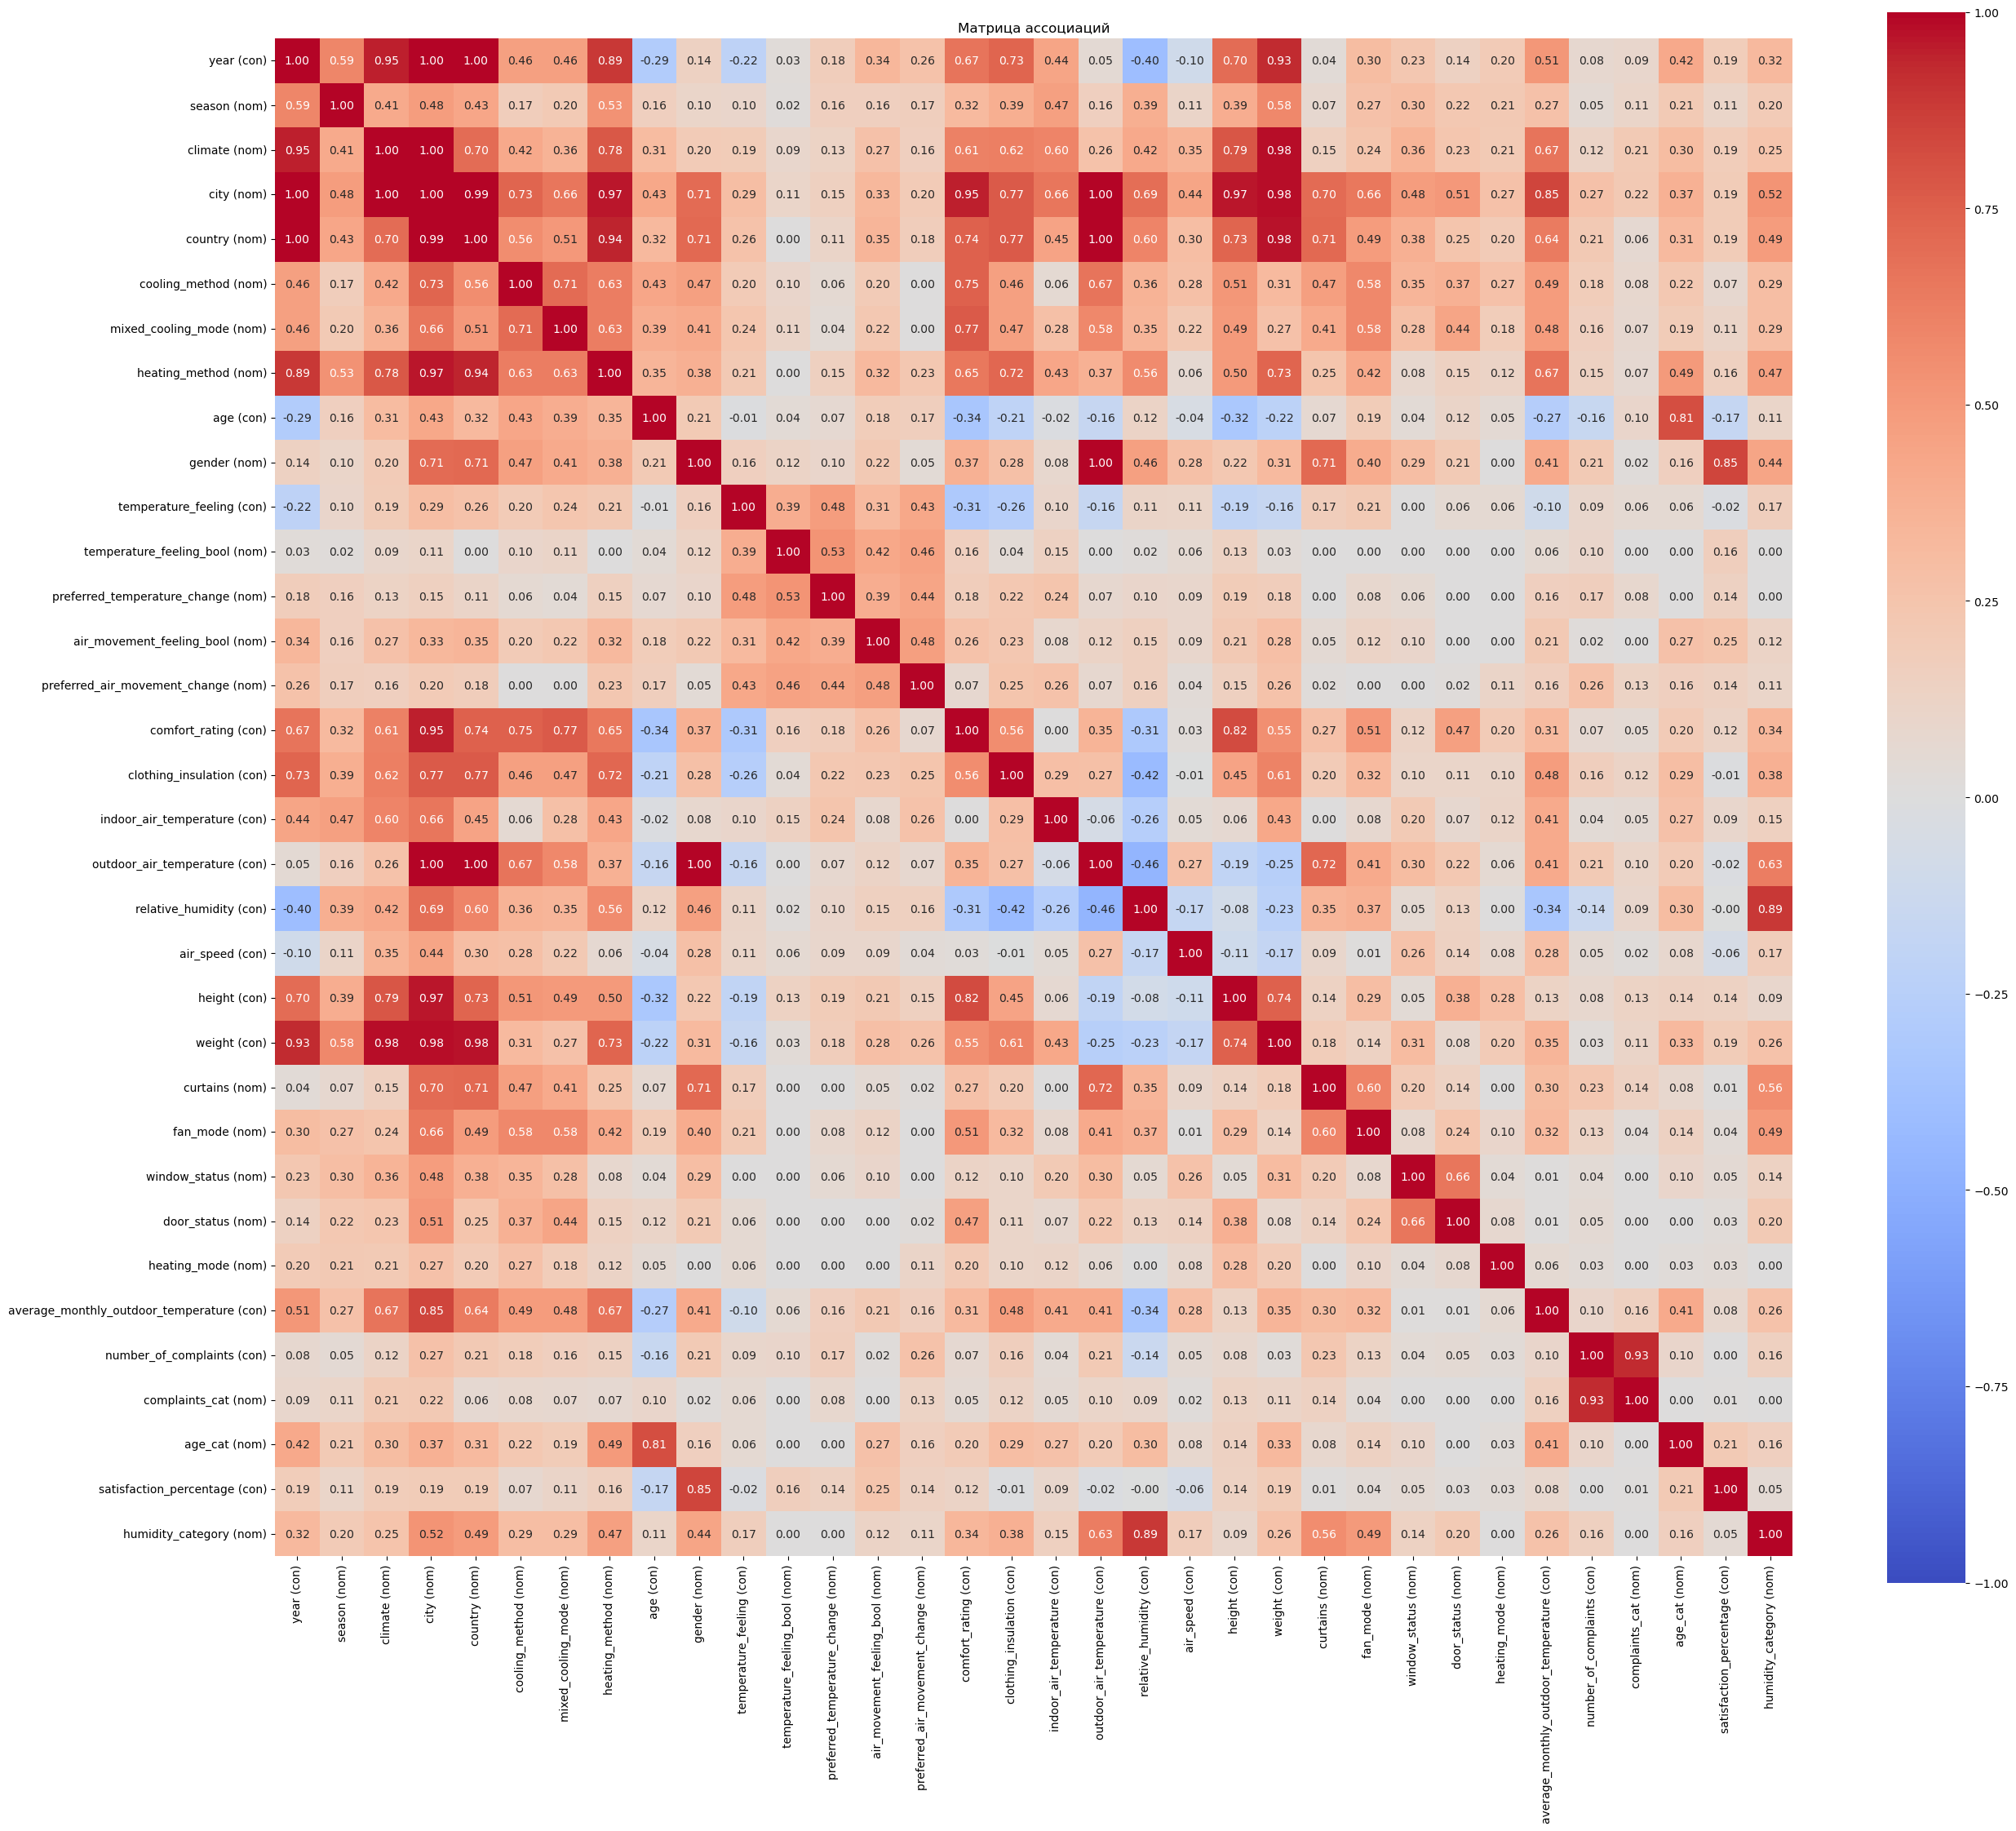

<Figure size 640x480 with 0 Axes>

In [82]:
plt.figure(figsize=(30, 25))
assoc_plot = associations(
    df,
    nominal_columns=cat_cols,
    mark_columns=True,
    figsize=(30, 25),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    title="Матрица ассоциаций"
)

plt.tight_layout()

plt.show()

Выводы будут скоро